In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("50Startups.csv")

In [13]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
df.shape

(50, 5)

In [15]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [16]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


##### Understanding data using Visualization

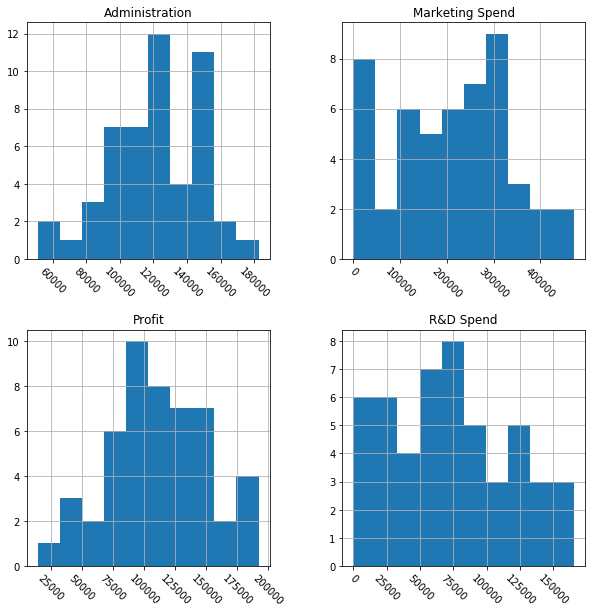

In [27]:
df.hist(xrot=-45,figsize=(10,10))
plt.show()

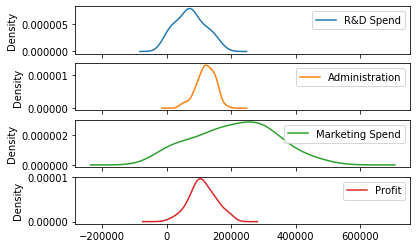

In [29]:
df.plot(kind='density', subplots=True, sharex = True)
plt.show()

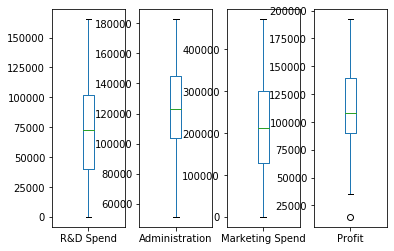

In [30]:
df.plot(kind = 'box', subplots=True, sharex = False, sharey = False)
plt.show()

##### Correlation matrix plot

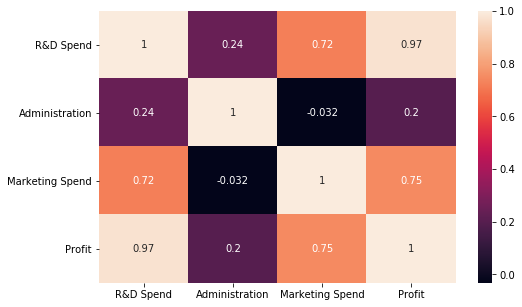

In [31]:
import seaborn as sns
plt.figure(figsize=(8,5))
correlation = df.corr().round(4)
sns.heatmap(data=correlation, annot=True)
plt.show()

In [32]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [33]:
correlations = df.corr(method = 'pearson')
print(correlations)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


##### Scatter matrix plot

In [35]:
from pandas.plotting import scatter_matrix

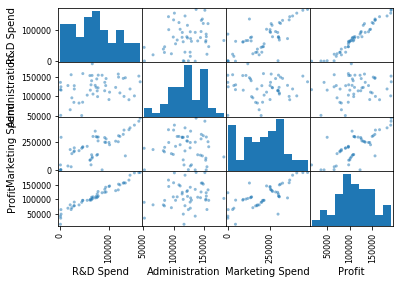

In [37]:
scatter_matrix(df)
plt.show()

##### Visualization between dependent and independent variables

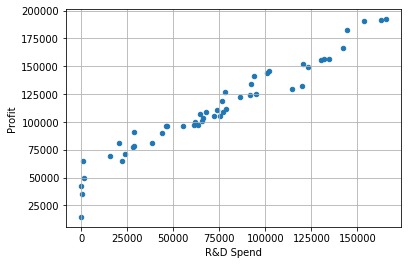

In [39]:
df.plot.scatter(x='R&D Spend', y='Profit')
plt.grid()
plt.show()

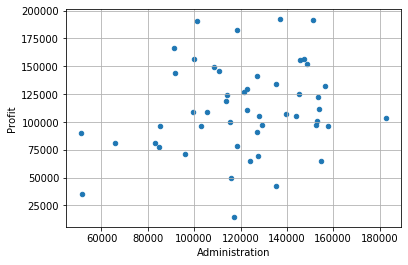

In [42]:
df.plot.scatter(x='Administration', y='Profit')
plt.grid()
plt.show()

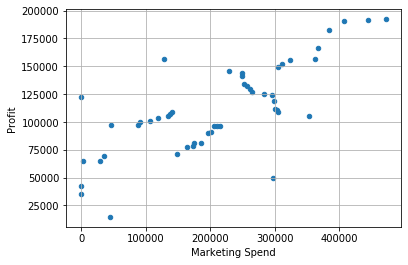

In [43]:
df.plot.scatter(x='Marketing Spend', y='Profit')
plt.grid()
plt.show()

##### Another type of visualization using seaborn

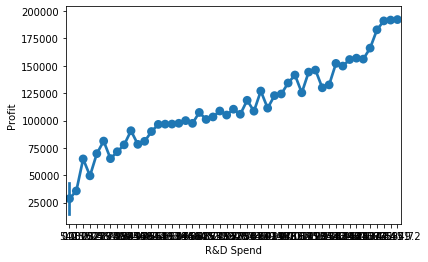

In [40]:
sns.pointplot(x='R&D Spend', y='Profit', data=df)
plt.show()

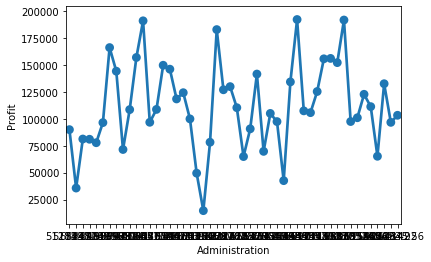

In [44]:
sns.pointplot(x='Administration', y='Profit', data=df)
plt.show()

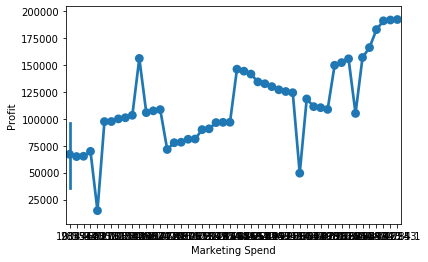

In [46]:
sns.pointplot(x='Marketing Spend', y='Profit', data=df)
plt.show()

##### using pointplot it is more easy to see the correlation between variables

##### Relationship between numerical vs categorical features using box plot

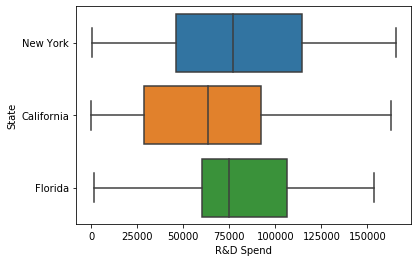

In [49]:
sns.boxplot(y='State', x='R&D Spend', data=df)
plt.show()

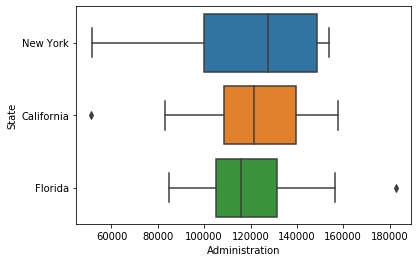

In [50]:
sns.boxplot(y='State', x='Administration', data=df)
plt.show()

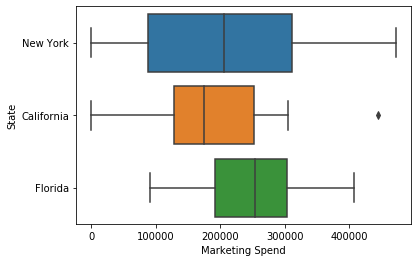

In [52]:
sns.boxplot(y='State', x='Marketing Spend', data=df)
plt.show()

##### Data Cleaning (Duplicates, Null values)

In [54]:
df.shape

(50, 5)

In [55]:
df = df.drop_duplicates()

In [56]:
df.shape

(50, 5)

In [57]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

##### Feature engineering (dummy variables)

In [58]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [60]:
print(df.State.value_counts())

New York      17
California    17
Florida       16
Name: State, dtype: int64


In [61]:
dummies = pd.get_dummies(df.State)

In [62]:
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [63]:
merge = pd.concat([df,dummies], axis=1)

In [64]:
merge.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [65]:
df = merge.drop(['State','California'], axis=1)

In [66]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [68]:
df.shape

(50, 6)

##### Create dependent (y) and independent (X) variables

In [69]:
target_feature = 'Profit'

#saperate object for target feature
y = df[target_feature]

#saperate object for input feature
X = df.drop(target_feature, axis = 1)


In [70]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [71]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [72]:
X.shape

(50, 5)

In [73]:
y.shape

(50,)

##### Split dataset to train and test

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [78]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((40, 5), (10, 5), (40,), (10,))

##### Bilding the model

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
mlr = LinearRegression()

In [81]:
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Applying trained model on test dataset to get the predicted values

In [82]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
27,72107.60,127864.55,353183.81,0,1
35,46014.02,85047.44,205517.64,0,1
40,28754.33,118546.05,172795.67,0,0
38,20229.59,65947.93,185265.10,0,1
2,153441.51,101145.55,407934.54,1,0


In [83]:
x_test.shape

(10, 5)

In [84]:
y_pred = mlr.predict(x_test)

In [85]:
y_pred

array([114664.4171587 ,  90593.15531618,  75692.84151576,  70221.88679649,
       179790.2551487 , 171576.9201852 ,  49753.58752024, 102276.65888937,
        58649.37795765,  98272.02561132])

In [86]:
y_pred.shape

(10,)

##### Compare the actual output (y_test) with predicted values (y_pred)

In [88]:
df1 = pd.DataFrame({ 'Actual':y_test, 'Predicted':y_pred, 'Variance': y_test-y_pred })

In [89]:
df1

,Actual,Predicted,Variance
27,105008.31,114664.417159,-9656.107159
35,96479.51,90593.155316,5886.354684
40,78239.91,75692.841516,2547.068484
38,81229.06,70221.886796,11007.173204
2,191050.39,179790.255149,11260.134851
3,182901.99,171576.920185,11325.069815
48,35673.41,49753.587520,-14080.177520
29,101004.64,102276.658889,-1272.018889
46,49490.75,58649.377958,-9158.627958
31,97483.56,98272.025611,-788.465611


##### Parameters (intercept  b and coefficients m )

In [91]:
mlr.intercept_

49549.70730366061

In [92]:
mlr.coef_

array([ 7.74342081e-01, -9.44369585e-03,  2.89183133e-02,  5.82738646e+02,
        2.72794662e+02])

##### Finding predicted values from new independent variables

In [93]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [94]:
mlr.predict([[153441.51,101145.55, 407934.54, 1, 0 ]])

array([179790.2551487])

##### Evaluation metrics for regression model

In [96]:
from sklearn.metrics import r2_score

In [97]:
score = r2_score(y_test,y_pred)*100
print("score", score)

score 96.49618042059875


In [98]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 7698.1198174958645
Mean Squared Error: 79495441.50424445
Root Mean Squared Error: 8916.021618650577
